# Convolutional VAE

In [1]:
import torch
from torchvision import transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load pallets library from project root
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', '..')))

from pallets import (
    images as I,
    datasets as DS,
    models as M,
    logging as L
)


# Settings

In [3]:
SAVE_NAME = 'vae.conv'

In [4]:
USE_GPU = True
LOG_LEVEL = 'INFO'
LABELS_FILE = 'pallets_labels.json'

TEST_SIZE = 1000
EPOCHS = 75
LR = 4e-04
BATCH_SIZE = 32

In [5]:
# To GPU, or not to GPU
device = M.get_device(require_gpu=USE_GPU)

# Logging
L.init_logger(level=LOG_LEVEL, notebook=True)


<Logger pallets (INFO)>

# Dataset

In [6]:
all_colors = I.get_punk_colors()
mapper = DS.ColorOneHotMapper(all_colors)
dataset = DS.OneHotCPunksDataset(
    mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
)

# Uncomment to put entire dataset in GPU RAM
# dataset = DS.FastOneHotCPunksDataset(
#     device, mapper, labels_file=LABELS_FILE, test_size=TEST_SIZE
# )

In [7]:
train_sampler = SubsetRandomSampler(dataset.train_idx)
test_sampler = SubsetRandomSampler(dataset.test_idx)

train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
test_loader = DataLoader(dataset, batch_size=BATCH_SIZE, sampler=test_sampler)

# Training

In [8]:
input_dim = 222
hidden_dims = (128, 64, 32)
latent_dim = 32

model = M.vae.ConvVAE(input_dim, hidden_dims, latent_dim)
criterion = M.vae.Loss()

train_losses, test_losses = M.vae.train(
    device, model, criterion, train_loader, test_loader,
    learn_rate=LR, epochs=EPOCHS
)

M.save(SAVE_NAME, model, train_losses, test_losses)

INFO | model: pallets.models.vae.ConvVAE
INFO | criterion: pallets.models.vae.Loss
INFO | learn rate: 0.0004
INFO | epochs: 75


INFO | epoch 1 (  0%) loss: 1418956.250000
INFO | epoch 1 ( 35%) loss: 130062.865138
INFO | epoch 1 ( 70%) loss: 73798.442271
INFO | epoch 1 (100%) loss: 56743.202126
INFO | epoch 1 (test) loss: 13819.024406
INFO | epoch 2 (  0%) loss: 14309.428711
INFO | epoch 2 ( 35%) loss: 13918.618967
INFO | epoch 2 ( 70%) loss: 13441.926942
INFO | epoch 2 (100%) loss: 13054.299509
INFO | epoch 2 (test) loss: 11484.147377
INFO | epoch 3 (  0%) loss: 12247.310547
INFO | epoch 3 ( 35%) loss: 11566.027324
INFO | epoch 3 ( 70%) loss: 11218.546608
INFO | epoch 3 (100%) loss: 10954.356154
INFO | epoch 3 (test) loss: 9941.875587
INFO | epoch 4 (  0%) loss: 10660.224609
INFO | epoch 4 ( 35%) loss: 9952.852771
INFO | epoch 4 ( 70%) loss: 9718.160662
INFO | epoch 4 (100%) loss: 9521.686549
INFO | epoch 4 (test) loss: 8681.236660
INFO | epoch 5 (  0%) loss: 9302.532227
INFO | epoch 5 ( 35%) loss: 8741.091487
INFO | epoch 5 ( 70%) loss: 8553.341578
INFO | epoch 5 (100%) loss: 8351.529666
INFO | epoch 5 (test) 

# Results

In [9]:
# Generate new image

z = torch.randn(1, latent_dim).to(device)
with torch.no_grad():
    model.eval()
    generated_image = model.decode(z)
    print(generated_image.shape)


decoded_one_hot = generated_image[0]
print(decoded_one_hot.shape)


torch.Size([1, 222, 24, 24])
torch.Size([222, 24, 24])


torch.Size([4, 24, 24])


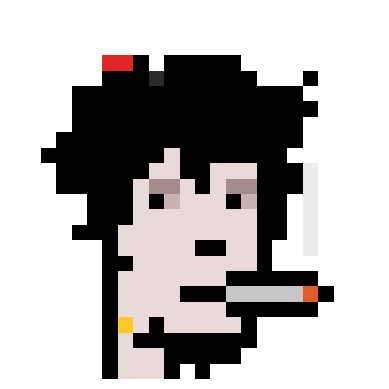

In [10]:
decoded = DS.one_hot_to_rgba(decoded_one_hot, dataset.mapper)
print(decoded.shape)

plt.imshow(transforms.functional.to_pil_image(decoded))
plt.axis('off')
plt.show()


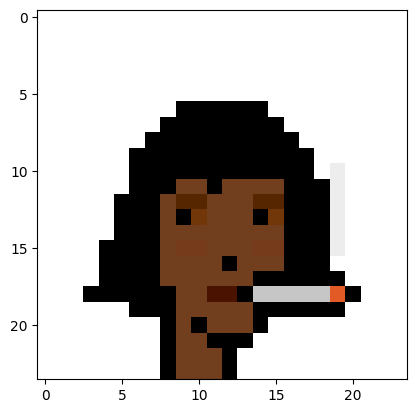

In [11]:
punk = I.get_punk_tensor(1000)

plt.imshow(transforms.functional.to_pil_image(punk))
plt.show()



torch.Size([1, 222, 24, 24])


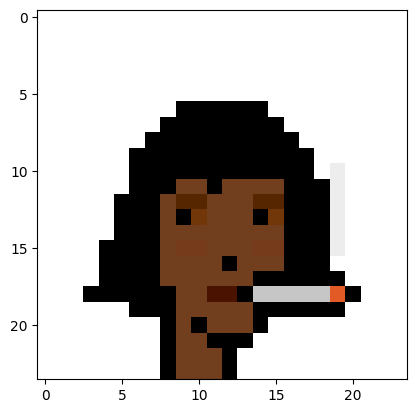

In [12]:
punk = I.get_punk_tensor(1000)

p = DS.rgba_to_one_hot(punk, dataset.mapper)
p = p.unsqueeze(0)
p = p.to(device)

model.eval()
with torch.no_grad():
    reconstructed, mu, logcar = model.forward(p)
    print(reconstructed.shape)

recon_punk = reconstructed[0].cpu()
recon_punk = DS.one_hot_to_rgba(recon_punk, dataset.mapper)
plt.imshow(transforms.functional.to_pil_image(recon_punk.cpu()))
plt.show()


## Losses

<function matplotlib.pyplot.show(close=None, block=None)>

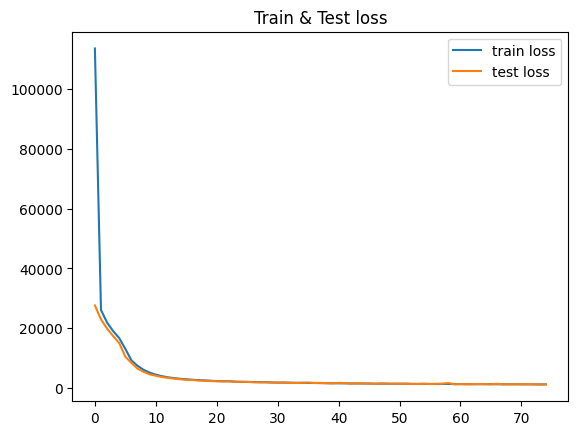

In [13]:
plt.title("Train & Test loss")
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show


In [14]:
train_losses


[113486.40425185616,
 26108.599017204124,
 21908.712308843085,
 19043.373098819815,
 16703.059332232104,
 13096.584973923704,
 9261.402337256899,
 7452.3045801473845,
 6114.972441977643,
 5155.559242410863,
 4492.24177583735,
 3987.7004022260085,
 3605.1866251627603,
 3343.490921994473,
 3108.629423533771,
 2944.0480935387577,
 2793.7575148995043,
 2660.317039543855,
 2575.590082696144,
 2449.2876900747315,
 2364.184023160461,
 2291.2669690720577,
 2321.2774593272106,
 2164.409832893534,
 2086.8194307367853,
 2073.9027601742573,
 2031.1181376572197,
 1996.3829479893893,
 1972.2597091350149,
 1894.4936295096757,
 1842.1132072286402,
 1850.6129565949136,
 1812.031687743275,
 1768.0459460535794,
 1770.425413091132,
 1720.051064565672,
 1721.8120399637426,
 1663.1111508633228,
 1657.5490431548856,
 1628.3564544028425,
 1603.4873914786265,
 1594.3741013547208,
 1561.1496421868073,
 1544.8594198024018,
 1556.0626454454787,
 1522.6832312184868,
 1483.4877743551917,
 1496.117097245886,
 1469.8

In [15]:
test_losses


[27638.04881286621,
 22968.29475402832,
 19883.751174926758,
 17362.473320007324,
 15044.617820739746,
 10473.438385009766,
 8424.872123718262,
 6490.5883865356445,
 5477.635330200195,
 4589.8966064453125,
 4138.286422729492,
 3702.768928527832,
 3428.738639831543,
 3187.4303283691406,
 2959.050395965576,
 2767.9078063964844,
 2722.8320388793945,
 2540.7122631073,
 2489.3399181365967,
 2376.880084991455,
 2276.371379852295,
 2231.610547065735,
 2222.297245979309,
 2097.9436798095703,
 2119.974862098694,
 2079.1568565368652,
 1967.128173828125,
 1912.8274030685425,
 1939.5089530944824,
 1882.170539855957,
 1820.9489212036133,
 1871.5407638549805,
 1775.624517440796,
 1716.2075366973877,
 1766.5043697357178,
 1860.0547161102295,
 1703.7500438690186,
 1746.2665309906006,
 1646.5037097930908,
 1583.9901113510132,
 1744.8977489471436,
 1659.2806940078735,
 1526.9343576431274,
 1621.0660209655762,
 1513.3032836914062,
 1528.7378559112549,
 1433.6088485717773,
 1593.8528985977173,
 1490.26661